Closest centroids for the first 3 examples:

[[0.]
 [2.]
 [1.]]

(the closest centroids should be 0, 2, 1 respectively)


Centroids computed after initial finding of closest centroids: 

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be

[2.428301 3.157924]
[5.813503 2.633656]
[7.119387 3.616684]



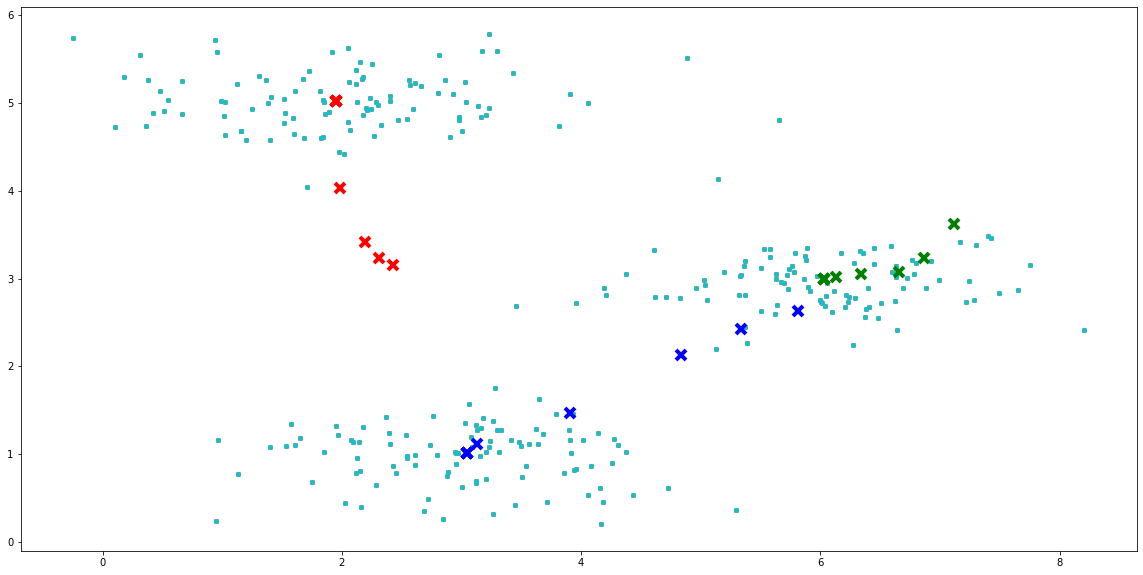

In [2]:
%matplotlib inline
from sklearn import svm
import scipy.io as io
import random
import scipy.optimize as op
from mpl_toolkits import mplot3d
import scipy.ndimage
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

def computeCentroids(X, idx, K):
    [m,n]=X.shape
    centroids = np.zeros((K, n))
    for i in range(0,K):
        centroids[i,:]=np.sum(X[np.where(idx==i)[0], :], 0)/np.sum((idx==i)*1)
    return centroids

def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))
    m = X.shape[0]
    for i in range(0,m):
        least=100000000
        for j in range(0,K):
            c=sum((X[i,:] - centroids[j,:])**2)
            if c<least:
                least=c
                idx[i] = j
    return idx

mat = io.loadmat('ex7data2.mat')
X=mat['X']

K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples:\n')
print(idx[0:3, :])
print('\n(the closest centroids should be 0, 2, 1 respectively)\n')

print()

centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)
print('\n(the centroids should be\n')
print('[2.428301 3.157924]')
print('[5.813503 2.633656]')
print('[7.119387 3.616684]\n')

K = 3
max_iters = 10
centroids=initial_centroids
for i in range(0,max_iters):
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx, K)
    palette = plt.hsv()
    plt.scatter(X[:,0], X[:,1], 15, palette)
    plt.plot(centroids[0,0], centroids[0,1], 'rx', centroids[1,0], centroids[1,1], 'bx', centroids[2,0], centroids[2,1], 'gx', ms=10, mew=4)
plt.show()

In [3]:
mat = io.loadmat('ex7data1.mat')
X=mat['X']
[m,n]=X.shape

mu=np.mean(X, axis=0).reshape(-1,1)
sigma=np.std(X, axis=0).reshape(-1,1)
X_norm=(X - mu.T)/sigma.T
Sigma=(1/m)*np.dot(X_norm.T,X_norm)
[U, S, V] = np.linalg.svd(Sigma)

print('Top eigenvector:')
print(U[0,:])
print('\nyou should expect to see [-0.707107 -0.707107]\n')

K = 1
Ureduce=U[:,0:K]
Z=np.dot(X_norm,Ureduce)
print('Projection of the first example:', Z[0])
print('(this value should be about 1.481274)\n')
        
X_rec=np.dot(Z,Ureduce.T)
print('Approximation of the first example:', X_rec[0,:])
print('(this value should be about -1.047419 -1.047419)\n')

Top eigenvector:
[-0.70710678 -0.70710678]

you should expect to see [-0.707107 -0.707107]

Projection of the first example: [1.49631261]
(this value should be about 1.481274)

Approximation of the first example: [-1.05805279 -1.05805279]
(this value should be about -1.047419 -1.047419)

